In [ ]:
# Reading raw data from github
train=pd.read_csv('https://github.com/raushan1info/NLP_MovieReview_Sentiment_Analysis/blob/main/train.csv.zip?raw=true',compression='zip')
test=pd.read_csv('https://github.com/raushan1info/NLP_MovieReview_Sentiment_Analysis/blob/main/test.csv.zip?raw=true',compression='zip')

In [ ]:
# Fundamental librabries
import pandas as pd
import numpy as np

In [ ]:
print(train.head())
print(test.head())

                                                text sentiment
0  Now, I won't deny that when I purchased this o...       neg
1  The saddest thing about this "tribute" is that...       neg
2  Last night I decided to watch the prequel or s...       neg
3  I have to admit that i liked the first half of...       neg
4  I was not impressed about this film especially...       neg
                                                text sentiment
0  My daughter liked it but I was aghast, that a ...       neg
1  I... No words. No words can describe this. I w...       neg
2  this film is basically a poor take on the old ...       neg
3  This is a terrible movie, and I'm not even sur...       neg
4  First of all this movie is a piece of reality ...       pos


In [ ]:
train.text[0]

"Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be very difficult to watch. I got a few smiles, sure, but the majority of the funny came from the music videos (which I've got on DVD) and the rest was basically filler. You could tell that this was not Al's greatest video achievement (that honor goes to UHF). Honestly, I doubt if this will ever make the jump to DVD, so if you're an ultra-hardcore Al fan and just HAVE to own everything, buy the tape off eBay. Just don't pay too much for it."

In [ ]:
# Checking nulls
print(train.isnull().sum(),'\n\tshape is: ',train.shape)
print(test.isnull().sum(),'\n\tshape is: ',test.shape)

text         0
sentiment    0
dtype: int64 
	shape is:  (25000, 2)
text         0
sentiment    0
dtype: int64 
	shape is:  (25000, 2)


In [ ]:
# Combinig both datasets
final_data=pd.concat([test,train],ignore_index=True)

In [ ]:
# creading rw data copy for a backup
df=final_data.copy()

In [ ]:
# Dropping duplicates
df.drop_duplicates(['text'],inplace=True)

In [ ]:
print(df.shape)
print(df.head())

(49582, 2)
                                                text sentiment
0  My daughter liked it but I was aghast, that a ...       neg
1  I... No words. No words can describe this. I w...       neg
2  this film is basically a poor take on the old ...       neg
3  This is a terrible movie, and I'm not even sur...       neg
4  First of all this movie is a piece of reality ...       pos


In [ ]:
# Total count against each sentiment
df.groupby(['sentiment']).count()

,text
sentiment,
neg,24698
pos,24884


In [ ]:
df.describe()

,text,sentiment
count,49582,49582
unique,49582,2
top,"My daughter liked it but I was aghast, that a ...",pos
freq,1,24884


Insights:

If the rating given by the customer is <=4 out of 10, then the sentiment is negative(neg).

If the rating given by the customer is >= 7 out of 10, then the sentiment is positive(pos).

And the neutral ratings are not included.

Deriving the sentiment score based on sentiment already provided, i.e., sentiment as "neg" will be scored as 0 and sentiment as "pos" will be scored as 1.

In [ ]:
# function to map 0 for neg and 1 for pos sentiment
def sentiment_map(text):
  if text=='pos':
    return 1
  else:
    return 0

In [ ]:
# adding new column based on sentiment data 1 for pros and 0 for neg
df['sentiment_score']=df.sentiment.map(lambda x : 1 if x=='pos' else 0)

In [ ]:
print(df.groupby(['sentiment_score']).count())
print('\n',df.sentiment_score.value_counts())

                  text  sentiment
sentiment_score                  
0                24698      24698
1                24884      24884

 1    24884
0    24698
Name: sentiment_score, dtype: int64


In [ ]:
df.describe()

,sentiment_score
count,49582.000000
mean,0.501876
std,0.500002
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Word Cloud Before Data Cleaning:

In [ ]:
from nltk.tokenize import wordpunct_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

Combining all review and storing as a string in a variable "combined_review"

In [ ]:
combined_review=' '.join(df.text.values) # str datatype will be created

In [ ]:
combined_review[:100]

"My daughter liked it but I was aghast, that a character in this movie smokes. As if it isn't awful e"

In [ ]:
wordcloud=WordCloud(max_words=200,stopwords='english').generate(combined_review)


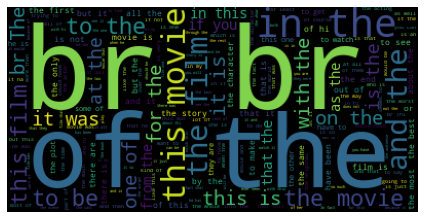

In [ ]:
# Uncleaned text data plot
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
#plt.show()

In [ ]:
wordcloud=WordCloud(width=400,height=800,max_words=50,background_color='white').generate_from_text(combined_review)

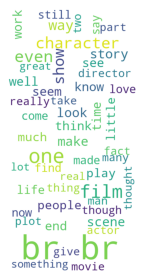

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()

Storing all the .

 function "wordpunct_tokenize" : it creates a seperate word if any str/word connected through any punctuation e.g. '3.88' then this function will return '3','.','88'

In [ ]:
terms=wordpunct_tokenize(combined_review.lower())
terms[:100]

['my',
 'daughter',
 'liked',
 'it',
 'but',
 'i',
 'was',
 'aghast',
 ',',
 'that',
 'a',
 'character',
 'in',
 'this',
 'movie',
 'smokes',
 '.',
 'as',
 'if',
 'it',
 'isn',
 "'",
 't',
 'awful',
 'enough',
 'to',
 'see',
 '"',
 'product',
 'placement',
 '"',
 'actors',
 'like',
 'bruce',
 'willis',
 'who',
 'smoke',
 'in',
 'their',
 'movies',
 '-',
 'at',
 'least',
 'children',
 'movies',
 'should',
 'be',
 'more',
 'considerate',
 '!',
 'i',
 'wonder',
 ':',
 'was',
 'that',
 'intentional',
 '?',
 'did',
 'big',
 'tobacco',
 '"',
 'sponsor',
 '"',
 'the',
 'film',
 '?',
 'what',
 'does',
 'it',
 'take',
 'to',
 'ban',
 'smoking',
 'from',
 'films',
 '?',
 'at',
 'least',
 'films',
 'intended',
 'for',
 'children',
 'and',
 'adolescents',
 '.',
 'my',
 'daughter',
 'liked',
 'it',
 'but',
 'i',
 'was',
 'aghast',
 ',',
 'that',
 'a',
 'character',
 'in',
 'this',
 'movie']

Function FredDist returns count of number of times used

In [ ]:
from nltk.probability import FreqDist

In [ ]:
freqdist=FreqDist(terms) # returns dict, with count of each word
#freqdist

In [ ]:
len(freqdist.keys())

104339

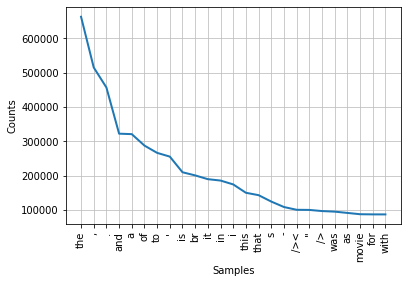

In [ ]:
# checking top 25 frequent used word
freqdist.plot(25,cumulative=False)

plt.show()

Counter(): Help to count the presence of each word/str

In [ ]:
from collections import Counter


In [ ]:
# listing out most common used 25 words 
words=[] # will use this list to use as stopwords
words_counts=[]
counter=Counter(freqdist)
for k,v in counter.most_common(25):
  words_counts.append((k,v))
  words.append(k)
  
  

In [ ]:
print(words_counts)
'\n'
print(words)

[('the', 662910), (',', 515097), ('.', 456701), ('and', 322091), ('a', 320717), ('of', 287338), ('to', 266120), ("'", 255216), ('is', 209631), ('br', 200425), ('it', 189437), ('in', 185416), ('i', 174140), ('this', 149810), ('that', 142815), ('s', 124159), ('-', 108276), ('/><', 100211), ('"', 99830), ('/>', 96478), ('was', 94816), ('as', 91076), ('movie', 87276), ('for', 86821), ('with', 86717)]
['the', ',', '.', 'and', 'a', 'of', 'to', "'", 'is', 'br', 'it', 'in', 'i', 'this', 'that', 's', '-', '/><', '"', '/>', 'was', 'as', 'movie', 'for', 'with']


# Data Cleaning

1. terms variable is a list, its tokenized list data
2. combined_review variable is str type
3. Main focus on stopwords,punctuation and length based cleaning

In [ ]:
from string import punctuation
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')   # This Package was missing to enable WordNetLemmatizer class, to fix that need to download it

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words1=stopwords.words('english')
stop_words=stop_words1+["..","...","!!","''","``","!!!","n't","'re'","'ve'","<br />","br","/><","would",".....",'....','!,"',"!).","!!<","......",'!!!!!"',"!!!!!!!!!!!"]
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Removing all stop words and punctuations along with any word which length is less than 3

In [ ]:
clean_review=[x for x in terms if x not in stop_words and x not in punctuation and len(x)>2]


In [ ]:
print(type(terms))
print(type(combined_review))

<class 'list'>
<class 'str'>


#Stemming
1. PorterStemmer : It is an algorithm that reduces words. e.g “retrieval”, “retrieved”, “retrieves” reduce to a single word “retrieve”.
2. SnowballStemmer : It's an advance version of PorterStemmer. It's call Porter2stemming as well.

In [ ]:
from nltk.stem import PorterStemmer,SnowballStemmer

In [ ]:
porterstemmer=PorterStemmer()
snowballstemmer=SnowballStemmer('english')

In [ ]:
# clean_review holds clean text
p_word=[porterstemmer.stem(word) for word in clean_review]
s_word=[snowballstemmer.stem(word) for word in clean_review]
print("p_word's length is : {}\ns_word's length is : {}".format(len(set(p_word)),len(set(s_word))))

p_word's length is : 72879
s_word's length is : 71952


#Lemmatization
1. WordNetLemmatizer class : It's an algorithm that the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # This Package was missing to enable WordNetLemmatizer class, to fix that need to download it
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
lemm_word=[lemmatizer.lemmatize(word) for word in clean_review]
print("lemm_word's length is : {}".format(len(set(lemm_word))))

lemm_word's length is : 93579


In [ ]:
print("p_word's length is : {}\ns_word's length is : {}\nlemm_word's length is : {}".format(len(set(p_word)),len(set(s_word)),len(set(lemm_word))))

p_word's length is : 72879
s_word's length is : 71952
lemm_word's length is : 93579


#Text_Cleaned:

Now will add a new column which will hld clean using lemmatization algorithm

In [ ]:
# function to clean the existing text in df
def clean_text(text):
  token_data=wordpunct_tokenize(text.lower())
  lemm_data=[lemmatizer.lemmatize(word) for word in token_data if word not in stop_words and word not in list(punctuation) and len(word)>2]
  return ' '.join(lemm_data)

In [ ]:
df['text_cleaned']=df.text.map(clean_text)

In [ ]:
df.head()

,text,sentiment,sentiment_score,text_cleaned
0,"My daughter liked it but I was aghast, that a ...",neg,0,daughter liked aghast character movie smoke aw...
1,I... No words. No words can describe this. I w...,neg,0,word word describe try sake brave people stick...
2,this film is basically a poor take on the old ...,neg,0,film basically poor take old urban legend baby...
3,"This is a terrible movie, and I'm not even sur...",neg,0,terrible movie even sure terrible ugly one tre...
4,First of all this movie is a piece of reality ...,pos,1,first movie piece reality well realized artist...


# Plot wordcloud after using clean text

In [ ]:
text_cleaned_combined=' '.join(df.text_cleaned.values)

In [ ]:
cloudword=WordCloud(max_words=50,width=800,height=400,background_color='white').generate(text_cleaned_combined)

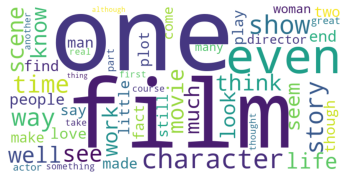

In [ ]:
plt.imshow(cloudword)
plt.axis('off')
plt.show()

Find out 25 most frequently used word after cleaning in text_cleaned column

In [ ]:
clean_terms=wordpunct_tokenize(text_cleaned_combined.lower())

In [ ]:
clean_freqdist=FreqDist(clean_terms)

In [ ]:
clean_freqdist

In [ ]:
# seperating 25 most frequent used words
clean_words=[]
clean_wordcount=[]
#counter=Counter(clean_freqdist)
for w,c in clean_freqdist.most_common(25):
  clean_words.append(w)
  clean_wordcount.append((w,c))


In [ ]:
clean_wordcount

[('movie', 102500),
 ('film', 92815),
 ('one', 55037),
 ('like', 40788),
 ('time', 31207),
 ('good', 29662),
 ('character', 28126),
 ('story', 25110),
 ('even', 24669),
 ('get', 24464),
 ('make', 24048),
 ('see', 23863),
 ('really', 22923),
 ('scene', 21298),
 ('well', 21283),
 ('much', 19151),
 ('bad', 18293),
 ('people', 18201),
 ('great', 18099),
 ('also', 17851),
 ('first', 17437),
 ('show', 17146),
 ('way', 17091),
 ('thing', 16364),
 ('made', 16004)]

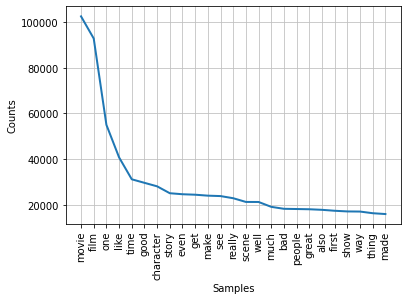

In [ ]:
clean_freqdist.plot(25,cumulative=False)

#Creating list of positive, negative and neutral words.

"SentimentIntensityAnalyzer" algorithm will be used from nltk.sentiment.vader module to to find out the words

VADER : Valence Aware Dictionary and sEntiment Reasoner.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')  # this is to avoid error

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia=SentimentIntensityAnalyzer()

In [ ]:
pos_words=[]
neg_words=[]
neu_words=[]
for word in clean_terms:
  if (sia.polarity_scores(word)['compound']) >= 0.5:
    pos_words.append((word,sia.polarity_scores(word)['compound']))
  elif (sia.polarity_scores(word)['compound']) <= -0.5:
    neg_words.append((word,sia.polarity_scores(word)['compound']))
  else:
    neu_words.append((word,sia.polarity_scores(word)['compound']))

In [ ]:
# count of all words in each category (Including Duplicates)
print('count of all words in each category (Including Duplicates):\n\nLength of positive words : {}\nLength of negatve words : {}\nLength of neutral words : {}'.format(len(pos_words),len(neg_words),len(neu_words)))

count of all words in each category (Including Duplicates):

Length of positive words : 154398
Length of negatve words : 137107
Length of neutral words : 5519317


Creating positive, negative and neutral words dataframe as per their count.

In [ ]:
# Creating a dataframe with words with their number of occurences
pos_words_count={}
neg_words_count={}
neu_words_count={}

# creating positive words dataframe
for k,v in pos_words:
  pos_words_count[k]=pos_words_count.get(k,0)+1
pos_words_count_series=pd.Series(pos_words_count)
pos_words_df=pd.DataFrame(pos_words_count_series).reset_index().rename(columns={'index':'Words',0:'Count'}).sort_values(by='Count',ascending=False)

# creating negative words dataframe
for k,v in neg_words:
  neg_words_count[k]=neg_words_count.get(k,0)+1
neg_words_count_series=pd.Series(neg_words_count)
neg_words_df=pd.DataFrame(neg_words_count_series).reset_index().rename(columns={'index':'Words',0:'Count'}).sort_values(by='Count',ascending=False)

# creating neutral words dataframe
for k,v in neu_words:
  neu_words_count[k]=neu_words_count.get(k,0)+1
neu_words_count_series=pd.Series(neu_words_count)
neu_words_df=pd.DataFrame(neu_words_count_series).reset_index().rename(columns={'index':'Words',0:'Count'}).sort_values(by='Count',ascending=False)

In [ ]:
print('Length of positive words : {}\nLength of negatve words : {}\nLength of neutral words : {}'.format(len(pos_words_df),len(neg_words_df),len(neu_words_df)))

Length of positive words : 364
Length of negatve words : 506
Length of neutral words : 92710


In [ ]:
h7705281

#Plotting  all three categoris data seperately based on most used 25 words from each category

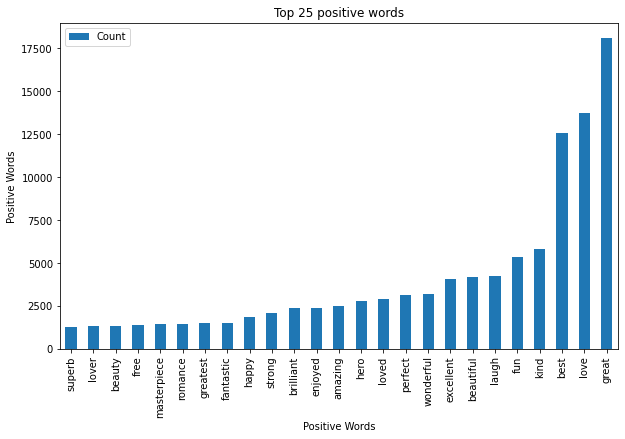

In [ ]:
pos_words_df.head(25).sort_values(by='Count',ascending=True).plot(kind='bar',x='Words',y='Count',figsize=(10,6))
plt.ylabel('Positive Words')
plt.xlabel('Positive Words')
plt.title('Top 25 positive words')
# for k,v in enumerate(pos_words_df.Count.head(25).sort_values(ascending=True)):
#   v+=4
#   plt.text(v,k, str(v),color='green',fontweight='bold')
plt.show()

In [ ]:
pos_words_df.Count.head(25).sort_values(ascending=True)

29     1296
12     1332
4      1347
73     1379
52     1446
37     1451
45     1502
41     1513
47     1830
33     2111
24     2391
40     2394
34     2508
44     2764
32     2894
7      3139
49     3203
13     4081
8      4189
2      4233
9      5342
1      5841
3     12556
6     13724
11    18099
Name: Count, dtype: int64

In [ ]:
pos_words_df.Words.head(25)

11          great
6            love
3            best
1            kind
9             fun
2           laugh
8       beautiful
13      excellent
49      wonderful
7         perfect
32          loved
44           hero
34        amazing
40        enjoyed
24      brilliant
33         strong
47          happy
41      fantastic
45       greatest
37        romance
52    masterpiece
73           free
4          beauty
12          lover
29         superb
Name: Words, dtype: object

In [ ]:
dict(zip(('a','b'),(1,2)))

{'a': 1, 'b': 2}